# Linear Regression Machine Learning approach

A linear Regression is a **linear approximation** of a **relationship** between conditional expectations of two or more variables

##### 1. What Are the Basic Assumption?
There are four assumptions associated with a linear regression model:

1. Linearity: The relationship between X and the mean of Y is linear.
2. Homoscedasticity: The variance of residual is the same for any value of X.
3. Independence: Observations are independent of each other.
4. Normality: For any fixed value of X, Y is normally distributed.

#####  2. Advantages
1. Linear regression performs exceptionally well for linearly separable data
2. Easy to implement and train the model
3. It can handle overfitting using 

##### 3. Disadvantages
1. Sometimes Lot of Feature Engineering Is required
2. If the independent features are correlated it may affect performance
3. It is often quite prone to noise and overfitting

##### 4. Whether Feature Scaling is required?
Yes
##### 5. Impact of Missing Values?
It is sensitive to missing values
##### 6. Impact of outliers?
linear regression needs the relationship between the independent and dependent variables to be linear. It is also important to check for outliers since linear regression is sensitive to outlier effects.

##### Types of Problems it can solve(Supervised)
1. Regression


### Import Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)
from sklearn import metrics

sns.set()  #if you want to use seaborn themes with matplotlib functions


In [54]:
# we use this rand_state = 1000 to keep getting the same data 
rand_state= 1000

In [55]:
# Let's import the Boston dataset from sklearn.datasets
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [56]:
# What can you get out of the data
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [57]:
# Check feature description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
# Check feature names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [59]:
# Check type of the data
type(boston.data)

numpy.ndarray

In [60]:
# Convert boston data into a dataframe
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

# adding the targer variable
df['price']= boston.target

In [61]:
# print first 5 rows of the dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Price** is our dependent feature (Y) the other features are our independent features 

## Explanatory Data Analysis: EDA


In [62]:
# Check amount of unique values in the feaures
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
price      229
dtype: int64

In [63]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**There are no null values present**

In [64]:
# Check amount of values in a feature
df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [65]:
# Check amount of values in a feature
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [66]:
# Get statistical info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**If we check our dependen feature Price we can see that the mean is 22.5 and the median (column 50%) is 21.2 which means our data is right skewed**

**Therefore we need to use log transformation on our dependent feature to get better accuracy**

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


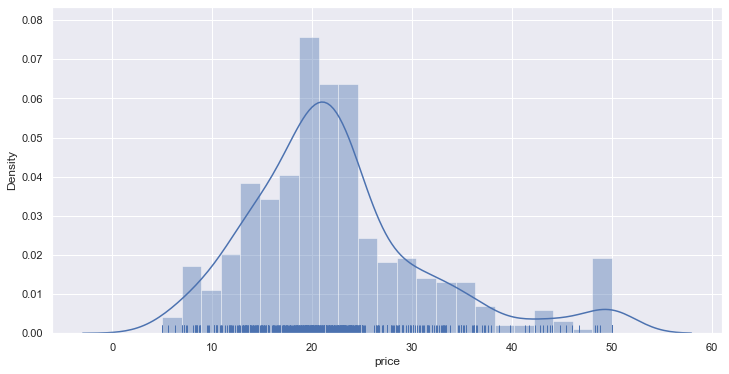

In [67]:
# Visualize our dependent feature 
plt.figure(figsize=(12,6))
sns.distplot(df['price'], rug=True)
plt.show()

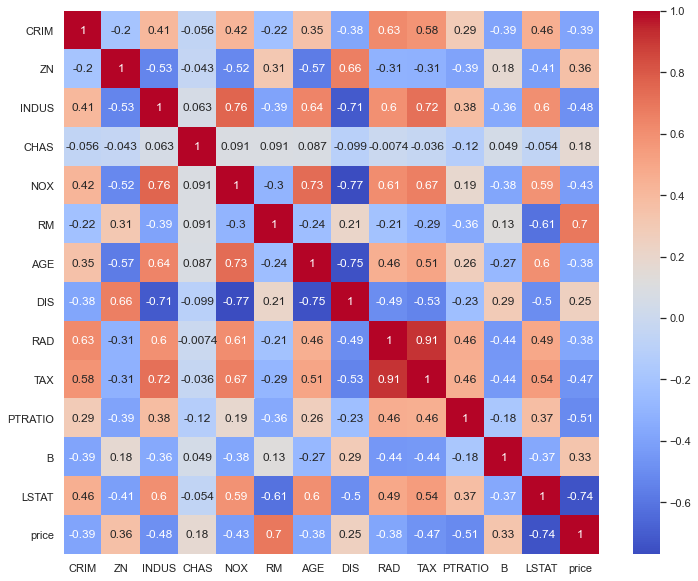

In [68]:
# Check the correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

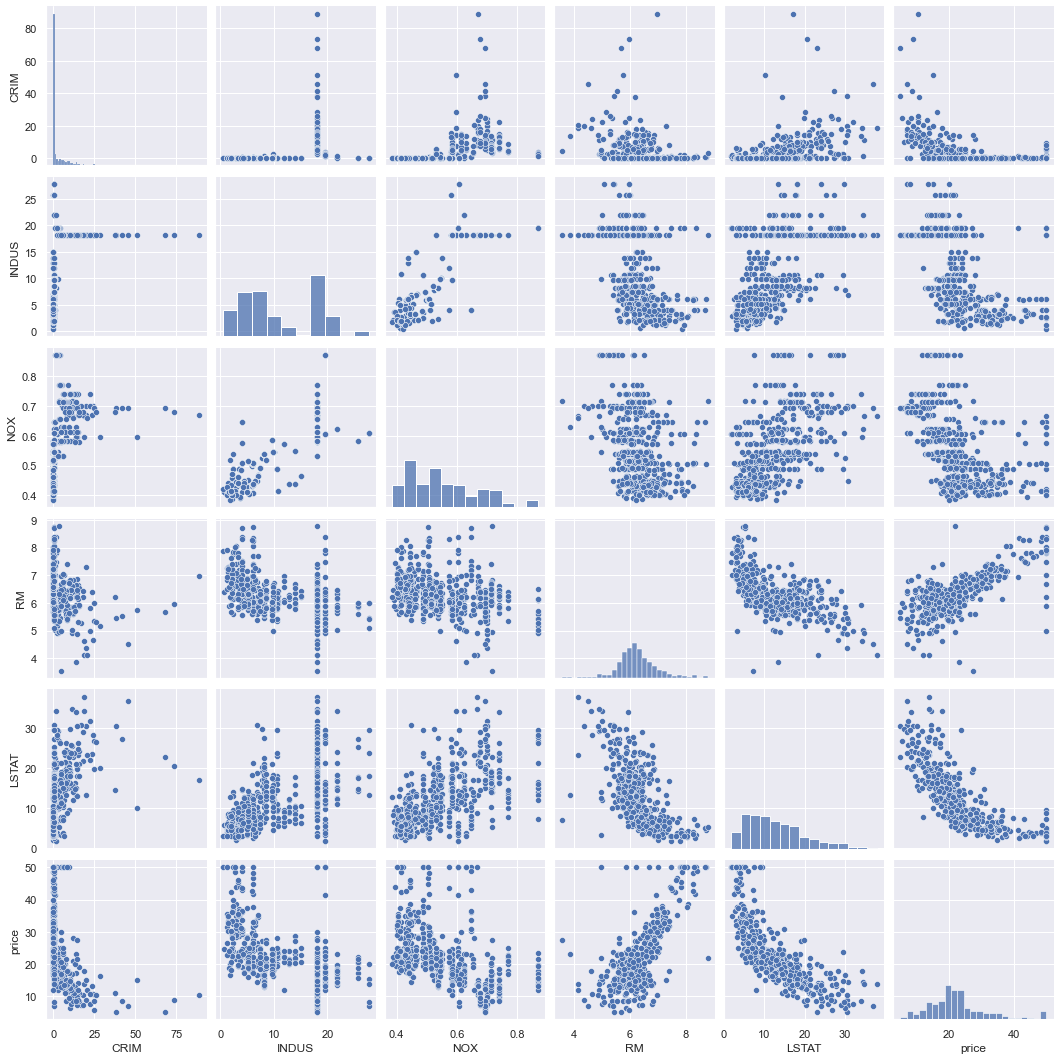

Wall time: 8.95 s


In [69]:
%%time 
# we picked the below features because they got high correlation with our dependent feature
sns.pairplot(df[['CRIM','INDUS','NOX','RM','LSTAT','price']])
plt.show()

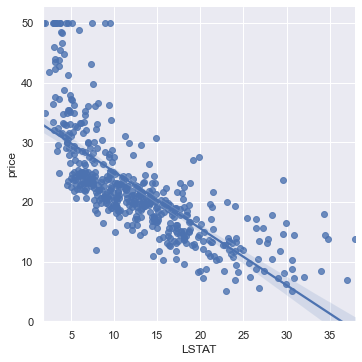

In [70]:
g= sns.lmplot(x='LSTAT', y='price', data=df)
g.set(ylim=(0, None))
plt.show()

It seems that there is a nonnar relationship between price and LSTAT

### Train and Test set Split

In [71]:
X = df.drop('price', axis=1) # becareful inplace= False (our independent feauture)
y = df['price'] # our dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.798

In [72]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91


## Linear Regression with Scikit-Learn

So far we have only worked with data frames using Pandas. Now we may need to transform our data into arrays by using numpy because sklearn uses arrays instead of data frames. 

**Scikit-learn** is a very powerful package enabling you to do almost everything in machine learning including Regression, Classification, Clustering, SVM and Dimensionality reduction. However, I don't recommend sklearn for deep learning algorithms. Pytorch, Tensorflow and Keras are better alternatives for deep learning. 

In [73]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [74]:
# Value of y intercept
lm.intercept_

43.36838818964445

In [75]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.127948
1,ZN,0.057532
2,INDUS,0.002219
3,CHAS,2.786839
4,NOX,-20.674401
5,RM,3.375093
6,AGE,0.000124
7,DIS,-1.774574
8,RAD,0.311517
9,TAX,-0.010825


#### Model Evaluation

In [76]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [77]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7484272373846235
Adjusted R^2: 0.7400414786307776
MAE: 3.277440174761426
MSE: 21.171852282225267
RMSE: 4.601288111195089


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

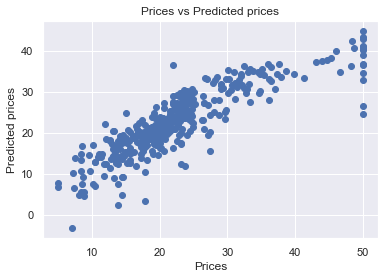

In [78]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

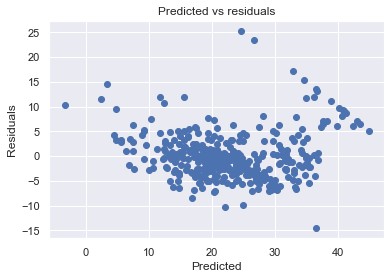

In [79]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

**There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied**

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


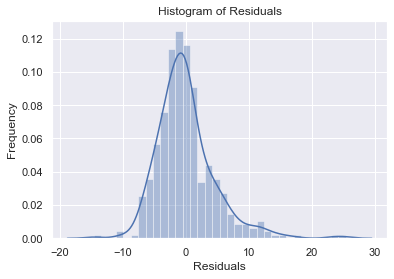

In [80]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

**Here the residuals are normally distributed. So normality assumption is satisfied**

In [81]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [82]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6942826395629575
Adjusted R^2: 0.6491198476802127
MAE: 3.601373205376008
MSE: 26.082365347173063
RMSE: 5.107089714032157


## Cross Validation 

Estimating the test set evaluation metrics using cross validation!
Remember, we are interested in model performance in the test set not train set!!

In [83]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [84]:
# What metrics are available for cross validation in sklearn?
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [85]:
my_estimator = LinearRegression()

In [86]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [87]:
R2

array([0.64095259, 0.70188733, 0.69301675, 0.76382877, 0.73940009])

In [88]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.708

This is the estimated version of $R^2_{test}$ which was about 0.694!

In [89]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")

In [90]:
MSE= -NMSE
MSE

array([33.49363219, 14.83051734, 20.95423932, 37.4838053 ,  9.84442331,
       24.5197077 , 13.88734797, 19.11258971, 25.99127302, 32.48326402])

In [91]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

23.26

This is the estimated version of **MSE_test** which was about 26.082!

In [92]:
RMSE = np.sqrt(MSE)
RMSE

array([5.78736833, 3.85104107, 4.57758007, 6.12240192, 3.1375824 ,
       4.95173785, 3.72657322, 4.37179479, 5.09816369, 5.69940909])

In [93]:
RMSE_CV = np.mean(RMSE)
np.round(RMSE_CV,3)

4.732

This is the estimated version of **RMSE_test** which was about 5.107!